# What is Quantum Computing

***

It is a type of computing that utilises properties of quantum states such as superposition, entanglement and interference to perform it's calculations.
Quantum computers process information in a fundementally different way to classical computing. Classical computers require transistors, which can be used to either represent '1' or '0' but quantum computers use qubits, which can represent 0 and 1 at the same time.
- Quantum computers increase exponentially in power by the amount of qubits linked together.
- Unlike classical computers which only increase in direction proprotion to the number of transistors <br>

A quantum circuit is a computational routine consisting of coherent quantum operations <br>
<img src="circuit.png" width="600"> <br>

#### *Initialization and reset*
- First we need to start our quantum computer with well definied quantum states. We accomplish this with the initialization and reset operations
- The resets can be performed by single-qubit gates and real-time classical computation.
    - they monitor whether we have achieved the desired state
- The initialization of q0 into a desired state  |ψ⟩ can then follow by applying single-qubit gates

#### *Quantum gates*
- We apply a sequence of quantum gates that manipulate the three qubits

#### *Measurements*
- We measure two of the three qubits
- A classical computer interprets these qubits as either 1 or 0 and then stores them

#### *Classically condition quantum gates*
- We apply single-qubit Z and X quantum gates on the third qubit
- These gates are conditioned on the results of the measurements stored in the two classical bits

### What do we need it for
- Quantum computers can solve complex problems which be used by business or to discover new technologies
- It would be able to simulate on a molecular level which would help pharmaceutical companies with making new drugs
- Current applications of quantum computing at the moment are searching for the Higgs event and origins of the universe
- Quantum computers are drastically fast compared to classical compueters
    - to search for a list containing 1 trillion items would require a classical computer a week, a quantum computer only one second
<br> <br>


## What is classical computing

***

- They require transistors which can either be on or off
- This information is stored in bits which are represented by either '1' or '0' <br>

Classical computers can outperform quantum computers in practical applications. Although quantum computers are believed to be able to solve certain complex problems such as interger factorization which would underline encryption or manipulate the blockchain and underline certain cryptocurrencies.
Here is a comparison of the two. <br>

| Quantum Computing | Classical Computing |
|------|------|
| Based on the phenomenon of quantum mechanics where it is possible to be in more than one state at a time | Based on the classical phenomenon of electrical circuit being in a single state at a time |
| Used by large scale 
| Information storage is based on a Quantum Bit or qubit | Information storage is based on a bit |
| A bit can be 1 or 0 at the same time | A bit can only be 1 or 0 |
| Circuit behaviour is governed by quantum physics | Circuit behaviour is governed by classical physics |
| SQUID or quantum transistors are the basic building blocks of classic computers | CMOS transistors are the basic building blocks of classical computers |
| Data processing is done in the Quantum Processing Unit (QPU) | Data processing is done in the Central Processing Unit (CPU) |
| Operations are defined by Linear Algebra over Hilbert space | Operations are defined by Boolean Algebra |

# The Deutsch-Jozsa Algorithm

[Official Website](https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html)

***

The Deutsch-Jozsa Algorithm, was the first example of a quantum algorithm performing better than the best classical algorithm. <br>
It showed that there can be advantages to using quantum computing as a computational tool for a specific problem. <br>

We will now implement the Deutsch-Jozsa algorithm for the example of a three-bit function. With both constant and balanced oracles
#### Code Below

***

In [1]:
# Imports
import numpy as np
# Qiskit 
import qiskit
# Aer simulator
import qiskit.providers.aer as aer
# Visualisation
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
# Changing pyplot style
plt.style.use('ggplot')

In [2]:
# Setting the length of the input register for our oracle
n = 3

In [3]:
# Constant Oracle
constant_oracle = qiskit.QuantumCircuit(n + 1)

output = np.random.randint(2)
if output == 1:
    constant_oracle.x(n)

constant_oracle.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3:

In [4]:
# Balanced Oracle
balanced_oracle = qiskit.QuantumCircuit(n + 1)
# For every qubit we place an X-gate if the corresponding digit is 1
balanced_string = '101'

# Placing X-gates
for qubit in range(len(balanced_string)):
    if balanced_string[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────

In [5]:
# Next we do Controlled-NOT gates, using each input qubit as a control, and the output qubit as a target

# Using barrier as divider
balanced_oracle.barrier()
# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw()

┌───┐ ░                 ░ 
q_0: ┤ X ├─░───■─────────────░─
     └───┘ ░   │             ░ 
q_1: ──────░───┼────■────────░─
     ┌───┐ ░   │    │        ░ 
q_2: ┤ X ├─░───┼────┼────■───░─
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ 
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░─
           ░ └───┘└───┘└───┘ ░

In [6]:
# To finish up the balanced oracle we place X-gates after the barrier
for qubit in range(len(balanced_string)):
    if balanced_string[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw()

┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

We have just created a balanced oracle. <br>
Now to see if Deutsch-Jozsa algorithm can solve it

In [7]:
# The first step in the algorithm is to initialise the input qubits in the |+⟩ and the output qubit in the state |−⟩
jozsa_circuit = qiskit.QuantumCircuit(n + 1, n)

# Applying H-gates
for qubit in range(n):
    jozsa_circuit.h(qubit)

# Putting qubit in state |->
jozsa_circuit.x(n)
jozsa_circuit.h(n)
jozsa_circuit.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤┌───┐
q_3: ┤ X ├┤ H ├
     └───┘└───┘
c: 3/══════════

In [8]:
# We now apply the balanced_oracle to the circuit
jozsa_circuit += balanced_oracle
jozsa_circuit.draw()

C:\Users\Pascal\AppData\Local\Temp/ipykernel_35448/3927475880.py:2: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  jozsa_circuit += balanced_oracle
C:\Users\Pascal\anaconda3\lib\site-packages\qiskit\circuit\quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


┌───┐┌───┐ ░                 ░ ┌───┐
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├
     ├───┤└───┘ ░   │             ░ └───┘
q_1: ┤ H ├──────░───┼────■────────░──────
     ├───┤┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░──────
     └───┘└───┘ ░ └───┘└───┘└───┘ ░      
c: 3/════════════════════════════════════

In [9]:
# We now perform H-dates on the n-input qubits and measure our input register

# Applying H-gates
for qubit in range(n):
    jozsa_circuit.h(qubit)
jozsa_circuit.barrier()

# Measure
for i in range(n):
    jozsa_circuit.measure(i, i)
    
jozsa_circuit.draw()

┌───┐┌───┐ ░                 ░ ┌───┐┌───┐ ░ ┌─┐      
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├┤ H ├─░─┤M├──────
     ├───┤└───┘ ░   │             ░ ├───┤└───┘ ░ └╥┘┌─┐   
q_1: ┤ H ├──────░───┼────■────────░─┤ H ├──────░──╫─┤M├───
     ├───┤┌───┐ ░   │    │        ░ ├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├┤ H ├─░──╫──╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘└───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░────────────░──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░            ░  ║  ║  ║ 
c: 3/═════════════════════════════════════════════╩══╩══╩═
                                                  0  1  2

C:\Users\Pascal\anaconda3\lib\site-packages\qiskit\utils\deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


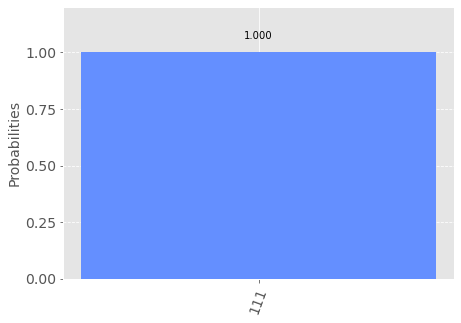

In [10]:
# Lets see the outputs
aer_simulator = aer.QasmSimulator()
qobj = qiskit.assemble(jozsa_circuit, aer_simulator)
results = aer_simulator.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

As we can see from the results there is a 0% chance of measuring 000. Deutsch-Jozsa's algorithm correctly predicts the function is balanced